# Explore correlations between indicators and death rates

In [1]:
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load indicators
indicators = pd.read_csv('../data/PRAMS/csv/PRAMS_2016_2019.csv')

# Reformat state names 
for state in indicators['State'].unique():
    new_name = state[0]
    for ii in state[1:]:
        if ii.isupper():
            new_name += ' '
        new_name += ii
    indicators.loc[indicators['State'] == state, 'State'] = new_name
indicators.loc[indicators['State'] == 'New York State', 'State'] = 'New York'

In [3]:
# Load maternal mortality
maternal = pd.read_csv('../data/maternal_mortality.csv')

In [4]:
# Merge maternal mortality rate and insurance
maternal = maternal.merge(
    indicators,
    how='inner',
    on='State'
)

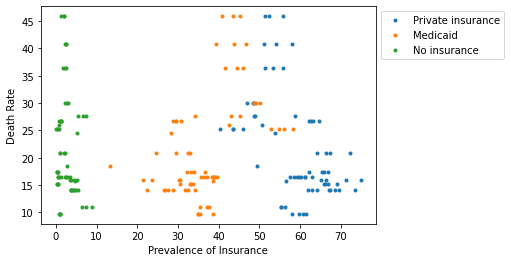

In [5]:
# Is there a relationship between maternal mortality and insurance?
insurance = maternal[maternal['Category'] == 'Health Insurance Status for Prenatal Care']
for indicator in ['Private insurance', 'Medicaid', 'No insurance']:
    temp = insurance[insurance['Indicator'] == indicator]
    plt.plot(temp['Prevalence'], temp['DeathRate'], '.', label=indicator)
plt.xlabel('Prevalence of Insurance')
plt.ylabel('Death Rate')
plt.legend(bbox_to_anchor=(1, 1));

In [6]:
# Load infant mortality
infant = pd.read_csv('../data/CDC/years.txt', sep='\t')
infant = infant[infant['State'].isna() == False]
infant = infant[infant['Year of Death'].isna() == False]

In [7]:
# Merge infant mortality rate and insurance
infant = infant.merge(
    indicators,
    how='inner',
    on='State'
)

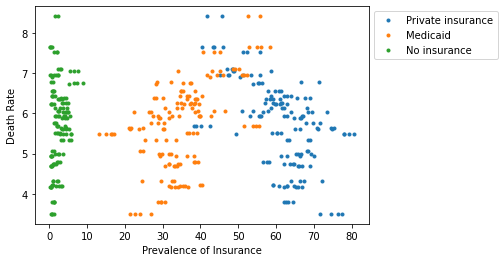

In [8]:
# Is there a relationship between infant mortality and insurance?
insurance = infant[infant['Category'] == 'Health Insurance Status for Prenatal Care']
for indicator in ['Private insurance', 'Medicaid', 'No insurance']:
    temp = insurance[insurance['Indicator'] == indicator]
    plt.plot(temp['Prevalence'], temp['Death Rate'], '.', label=indicator)
plt.xlabel('Prevalence of Insurance')
plt.ylabel('Death Rate')
plt.legend(bbox_to_anchor=(1, 1));

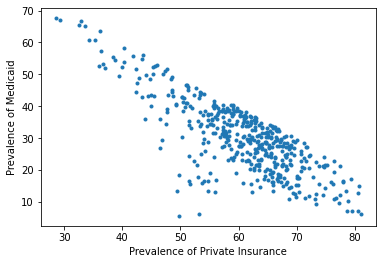

In [9]:
# It looks like prevalence of private insurance is negatively correlated with mortality,
# while prevalence of medicaid is positively correlated with mortality.
# Of course, states with more private insurance will have less medicaid, and vice versa.
# If building a model, would only want to use one, the other, or a ratio because they are correlated
private = indicators[indicators['Indicator'] == 'Private insurance']
medicaid = indicators[indicators['Indicator'] == 'Medicaid']
plt.plot(private['Prevalence'], medicaid['Prevalence'], '.')
plt.xlabel('Prevalence of Private Insurance')
plt.ylabel('Prevalence of Medicaid');

In [10]:
# What is the relative risk of death having insurance or not having insurance?
# Does this relative risk vary by state?
# If we fit a linear model between death rate and insurance, would the 
# coefficients be statistically significant?
# Could we fill in missing data for maternal mortality using covariates?
# Could we make an interesting interactive visualization?